In [19]:
import fsps
import numpy as np
import pandas as pd
import astropy.cosmology as cos
from astropy.cosmology import FlatLambdaCDM
import unyt as u
import pickle

In [2]:
# Convert redshift to age
# Universe is abt 4.54 Gyrs

univ_age = 13.8 # Gyr

univ_age - FlatLambdaCDM(H0=70,Om0=0.3).lookback_time(20).to_value()


0.5096806286049151

In [3]:
rs_list = [2,2.5,3]

wave = 1
spec = 23

spec_dat = {}
for rs in rs_list:
    age = univ_age - FlatLambdaCDM(H0=70,Om0=0.3).lookback_time(rs).to_value()


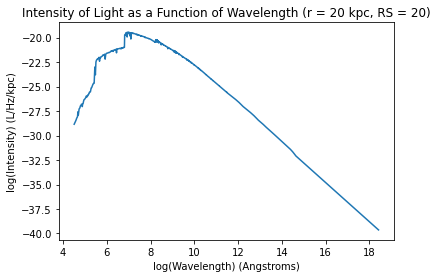

In [16]:
import pickle
import matplotlib.pyplot as plt
with open("spec_dat.pickle",'rb') as b:
        dat = pickle.load(b)

plt.plot(np.log(dat[20][20]['wave']),np.log(dat[20][20]['spec']))
# plt.plot(np.log(dat[20][18]['wave']),np.log(dat[20][18]['spec']))
# plt.plot(np.log(dat[20][16]['wave']),np.log(dat[20][16]['spec']))
# plt.ylim([-22.5,-20])
plt.xlabel("log(Wavelength) (Angstroms)")
plt.ylabel("log(Intensity) (L/Hz/kpc)")
plt.title("Intensity of Light as a Function of Wavelength (r = 20 kpc, RS = 20)")
plt.show()

In [47]:
msk = (dat[20][20]['wave']>1e3) & (dat[20][20]['wave']<4e3)
spec = dat[20][20]['spec']
wave = dat[20][20]['wave']

In [48]:
with open("putbins.pkl",'rb') as f:
    nbins = np.asarray(pickle.load(f))

def rebin(wave,spec):
    
    # convert spectral data into luminosities
    lum = spec*((wave*1e-10)/3e8)
    
    nlum = np.zeros(len(nbins))
    
    # converting wave data into energy
    Ryd = 2.1798723611035e-18 * u.J
    wave = wave * u.Angstrom
    E = wave.to("J", equivalence="spectral") / Ryd
    
    # compare converted energy data to desired binning to rebin spec data
    for i in range(nbins.size-1, -1, -1):
        # accounting for indexing issues in first bin
        if i == 0:
            print(i)
            nlum[i] = sum(lum[np.where((E<=nbins[i]))])
        else:
            nlum[i] = sum(lum[np.where((E<=nbins[i])&(E>=nbins[i-1]))])
    
    # creating wave array for luminosity conversion
    nE = list(nbins) * u.J
    nwave = nE.to("Angstrom", equivalence="spectral") * Ryd
    
    # converting luminosities back into intensity
    nspec = nlum*(3e8/(nwave.to_value()*1e-10))
    
    return nbins, nspec

In [49]:
nu,spec = rebin(wave,spec)

0


In [52]:
dlist = [20,50,100,150,200]

for d in dlist:
    d_m = d*3.086e19
    print(np.max(np.log(spec/d_m**2)))

-29.30415045173626
-31.136731915484567
-32.52302627660446
-33.33395649282079
-33.90932063772435


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
